# Predicting Used Car Price Using Machine Learning
## PredictiveWizards
### Farah Ahmed, Megan Tiet,Musa Mustapha, Priyanka Singh

In [1]:
#! pip install xgboost
# category_encoders is a Python library designed for encoding categorical variables in machine learning datasets.
#! pip install category_encoders 
#!pip install --upgrade seaborn

#!pip install matplotlib==3.7.3

# !pip install jupyter_contrib_nbextensions


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import pickle

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Packages short description

1. **NumPy (np):**
   - Provides support for large, multi-dimensional arrays and matrices.
   - Offers mathematical functions to operate on these arrays.

2. **Pandas (pd):**
   - Data manipulation and analysis library.
   - Provides data structures like DataFrames for efficient data handling.

3. **Matplotlib (plt):**
   - 2D plotting library for creating static, animated, and interactive visualizations in Python.

4. **os:**
   - Provides a way of interacting with the operating system.
   - Useful for tasks such as reading or writing to the file system.

5. **Seaborn (sns):**
   - Data visualization library based on Matplotlib.
   - Simplifies the creation of informative and attractive statistical graphics.

6. **Scikit-learn:**
   - Machine learning library for classical machine learning algorithms.
   - Includes tools for data preprocessing, model selection, and evaluation.

   - **MinMaxScaler:**
     - Scales features to a specified range (default is [0, 1]).

   - **StandardScaler:**
     - Standardizes features by removing the mean and scaling to unit variance.

   - **LinearRegression:**
     - Implements linear regression, a method for modeling the relationship between dependent and independent variables.

   - **RidgeCV, Ridge:**
     - Implements Ridge regression, which adds a penalty term to linear regression to prevent overfitting.
     - RidgeCV in scikit-learn is a Ridge regression with built-in cross-validated selection of the
       regularization parameter (alpha). 

   - **LassoCV, ElasticNetCV:**
     - Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression technique 
       that includes L1 regularization. LassoCV performs Lasso regression with cross-validated selection of the regularization parameter(alpha).
     - Elastic Net regression is a linear regression technique that combines both L1 and L2 regularization. ElasticNetCV performs Elastic Net
       regression with cross-validated selection of both the regularization parameter alpha and *L1* ratio. *L1* ratio controls the balance 
       between the L1 and L2 penalties. 

   - **RandomForestRegressor:**
     - Ensemble learning method based on decision tree classifiers for regression.

   - **XGBRegressor:**
     - Implementation of the XGBoost (Extreme Gradient Boosting) algorithm for regression.

   - **DecisionTreeRegressor:**
     - Decision tree-based regression algorithm.

   - **SVR (Support Vector Regressor):**
     - Implementation of Support Vector Machines for regression.

   - **KNeighborsRegressor:**
     - Regression based on k-nearest neighbors algorithm.

   - **metrics:**
     - Various metrics for evaluating regression models, including R-squared, mean absolute error, and mean squared error.

   - **TargetEncoder:**
     - Encodes categorical features by replacing them with the mean of the target variable for each category.

   - **train_test_split:**
     - Splits data into training and testing sets.

   - **cross_val_score:**
     - Performs cross-validated scoring of a model.

7. **Category Encoders:**
   - Library for encoding categorical variables.
   - Includes various encoding methods, and here specifically, we have the TargetEncoder.

8. **Warnings:**
   - Python standard library for issuing warnings.
   - Used here to filter and ignore warnings during execution.

# Data summaries

## Read the csv data and check necessary Information 

In [3]:
os.chdir('../../classdata/group06')
df_train = pd.read_csv ('train.csv') # read the training data

In [4]:
df_train.head(10) # check first 10 rows of the training data

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595
5,FIAT,500 Sport,2012.0,83908.0,1.4L I4 16V MPFI SOHC,1.4,NaN,0.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Black,Giallo (Yellow),9400
6,Kia,Carnival LXS,2022.0,43705.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,1.0,Gasoline,Front-wheel Drive,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,Gray,Silky Silver,34000
7,Audi,SQ5 3.0T Premium,2022.0,5922.0,3.0L V6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Black,Florett Silver Metallic,49495
8,Honda,Pilot Special Edition,2021.0,51299.0,3.5L V6 24V GDI SOHC,3.5,9-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,Black,Modern Steel Metallic,35999
9,Jeep,Grand Cherokee Altitude,2019.0,36120.0,3.6L V6 24V MPFI DOHC,3.6,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Black,Granite Crystal Clearcoat Metallic,33995


In [5]:
df_train.shape # checking the dimensions of the training data

(19109, 36)

In [6]:
df_train.info() # check the summary of the training data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

In [7]:
df_train.describe() # Generate descriptive statistics of the training data

,year,mileage,engine_size,automatic_transmission,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,...,sunroof/moonroof,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats
count,19107.000000,19107.000000,17860.000000,19107.000000,16103.000000,16103.000000,18940.000000,18803.000000,18920.000000,19107.000000,...,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000
mean,2017.773120,47947.087403,2.973191,0.917098,20.827796,27.817270,0.217371,0.517417,0.718288,0.404250,...,0.411577,0.174386,0.949600,0.696603,0.486000,0.148741,0.387240,0.870100,0.351547,0.485320
std,4.996385,38285.061200,5.478008,0.275741,6.017846,6.513062,0.412468,0.499710,0.449846,0.490759,...,0.492132,0.379451,0.218775,0.459737,0.499817,0.355843,0.487132,0.336202,0.477466,0.499798
min,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,19307.000000,2.000000,1.000000,17.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2019.000000,39141.000000,2.500000,1.000000,20.000000,28.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2021.000000,68431.500000,3.500000,1.000000,24.000000,31.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2024.000000,383614.000000,390.000000,1.000000,89.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Transform, clean, and prepare the data for analysis.

## Prepare the data before missing value imputation 

In [8]:
df_train['price'] = pd.to_numeric(df_train['price'], errors='coerce')

`errors='coerce'`: This parameter is set to 'coerce', which means that if there are any values in the 'price' column that cannot be converted to numeric type, Pandas will replace those values with NaN (Not a Number)

In [9]:
# Counts the number of missing (null) values in each column of the DataFrame df_train.
# This is a quick way to assess the extent of missing data in the dataset.
df_train.isnull().sum()

brand                             2
model                             2
year                              2
mileage                           2
engine                           47
engine_size                    1249
transmission                    105
automatic_transmission            2
fuel_type                         2
drivetrain                        2
min_mpg                        3006
max_mpg                        3006
damaged                         169
first_owner                     306
personal_using                  189
turbo                             2
alloy_wheels                      2
adaptive_cruise_control           2
navigation_system                 2
power_liftgate                    2
backup_camera                     2
keyless_start                     2
remote_start                      2
sunroof/moonroof                  2
automatic_emergency_braking       2
stability_control                 2
leather_seats                     2
memory_seat                 

## Missing value imputation

In [10]:
df_train.dropna(subset=['price'], inplace=True) # dropped rows where price (target) was null

In [11]:
def replace_mean_groupby (column, data): # replace numerical null values with mean grouped by brand
    for i in column:
        data[i] = data[i].fillna(data.groupby(['brand'])[i].transform('mean'))
    return data

In [12]:
# replace nan values using replace_mean_groupby function
df_train = replace_mean_groupby(['engine_size', 'min_mpg', 'max_mpg'], df_train) 

In [13]:
def replace_categorial (column, data, fill): # replaced categorical null values with bfill aftersorting by brand
    for i in column:
        data.sort_values(by=['brand', i], ascending=[True, True])
        data[i] = data[i].fillna(method = fill)
    return data

In [14]:
# replace nan values using replace_categorial function

df_train = replace_categorial(['engine', 'transmission', 'interior_color', 'exterior_color'], df_train, 'bfill')

In [15]:
def replace_mode_groupby (column, data): # replaced null values with mode
    for i in column:
        m = data[i].mode()[0]
        data[i] = data[i].fillna(value=m)
    return data

In [16]:
# replace nan values using replace_mode_groupby function
df_train = replace_mode_groupby(['damaged', 'first_owner', 'personal_using'], df_train)

In [17]:
df_train.isnull().sum() # checking after the missing value imputation

brand                          0
model                          0
year                           0
mileage                        0
engine                         0
engine_size                    0
transmission                   0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
min_mpg                        0
max_mpg                        0
damaged                        0
first_owner                    0
personal_using                 0
turbo                          0
alloy_wheels                   0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
third_row_seating              0
apple_car_play/android_auto    0
bluetooth 

## Handling categorical and continuous features 

### Separate categorical and continuous features

In [18]:
def check_dtype(x):
    """
    Categorizes the columns of a DataFrame into categorical and continuous features.

    Parameters:
    - x (pd.DataFrame): Input DataFrame to analyze.

    Returns:
    Tuple: A tuple containing two lists - cate_features and cont_features.
        - cate_features (list): List of column names with 'object' dtype, indicating categorical features.
        - cont_features (list): List of column names with 'float' dtype, indicating continuous (numeric) features.
    """
    cate_features = []    # Categorical features list
    cont_features = []    # Continuous (numerical) features list
    for i in x.columns:
        if x[i].dtype == object:
            cate_features.append(i)
        elif x[i].dtype == float:
            cont_features.append(i)
    return cate_features, cont_features

In [19]:
# separating categorical and continuous features using check_dtype function
cate_features, cont_features = check_dtype(df_train)

In [20]:
cate_features, cont_features # print the lists

(['brand',
  'model',
  'engine',
  'transmission',
  'fuel_type',
  'drivetrain',
  'interior_color',
  'exterior_color'],
 ['year',
  'mileage',
  'engine_size',
  'automatic_transmission',
  'min_mpg',
  'max_mpg',
  'damaged',
  'first_owner',
  'personal_using',
  'turbo',
  'alloy_wheels',
  'adaptive_cruise_control',
  'navigation_system',
  'power_liftgate',
  'backup_camera',
  'keyless_start',
  'remote_start',
  'sunroof/moonroof',
  'automatic_emergency_braking',
  'stability_control',
  'leather_seats',
  'memory_seat',
  'third_row_seating',
  'apple_car_play/android_auto',
  'bluetooth',
  'usb_port',
  'heated_seats',
  'price'])

### Change object type features with binary class levels to `int` type

In [21]:
def change_to_int_type(col_lis, data):
    """
    Converts specified columns with a small number of unique values to integer type in a DataFrame.

    Parameters:
    - col_lis (list): List of column names to be considered for conversion.
    - data (pd.DataFrame): Input DataFrame to perform the type conversion.

    Returns:
    pd.DataFrame: DataFrame with specified columns converted to integer type.
    """  
    for i in col_lis:
        if len(data[i].unique()) < 4:
            data[i] = data[i].astype(int)
    return data

In [22]:
# changing the feature type using change_to_int_type function
df_train = change_to_int_type(cont_features, df_train)

In [23]:
df_train['year'] = df_train['year'].astype(int) # Convert year from float to int

In [24]:
df_train.info() # Checking if all the binary class features converted to int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19075 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19075 non-null  object 
 1   model                        19075 non-null  object 
 2   year                         19075 non-null  int64  
 3   mileage                      19075 non-null  float64
 4   engine                       19075 non-null  object 
 5   engine_size                  19075 non-null  float64
 6   transmission                 19075 non-null  object 
 7   automatic_transmission       19075 non-null  int64  
 8   fuel_type                    19075 non-null  object 
 9   drivetrain                   19075 non-null  object 
 10  min_mpg                      19075 non-null  float64
 11  max_mpg                      19075 non-null  float64
 12  damaged                      19075 non-null  int64  
 13  first_owner     

# Visualization of the features and target distribution and feature engineering

## Visualization of the target variable `price`

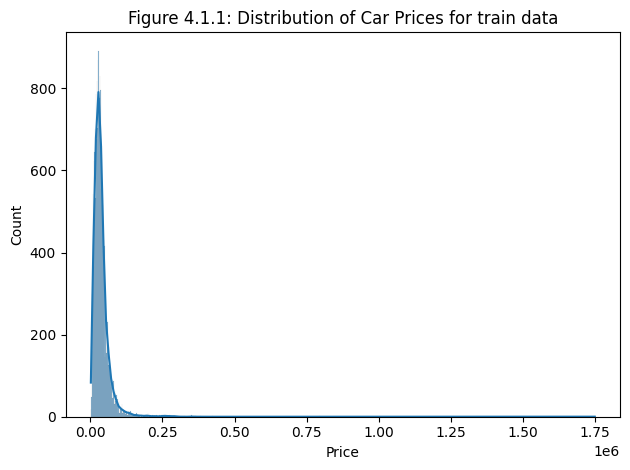

In [25]:
# Histogram of the Distribution of Car Prices
plt.figure()
sns.histplot(df_train['price'], kde=True)
plt.title('Figure 4.1.1: Distribution of Car Prices for train data')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [26]:
sorted(df_train['price'],reverse=True)[:20] #Top 20 Highest Prices -Which shows some outliers

[1750000.0,
 1650000.0,
 1599000.0,
 795000.0,
 449000.0,
 423998.0,
 381611.0,
 364900.0,
 350000.0,
 350000.0,
 349990.0,
 325900.0,
 309000.0,
 299900.0,
 299800.0,
 294900.0,
 294895.0,
 292900.0,
 291981.0,
 289995.0]

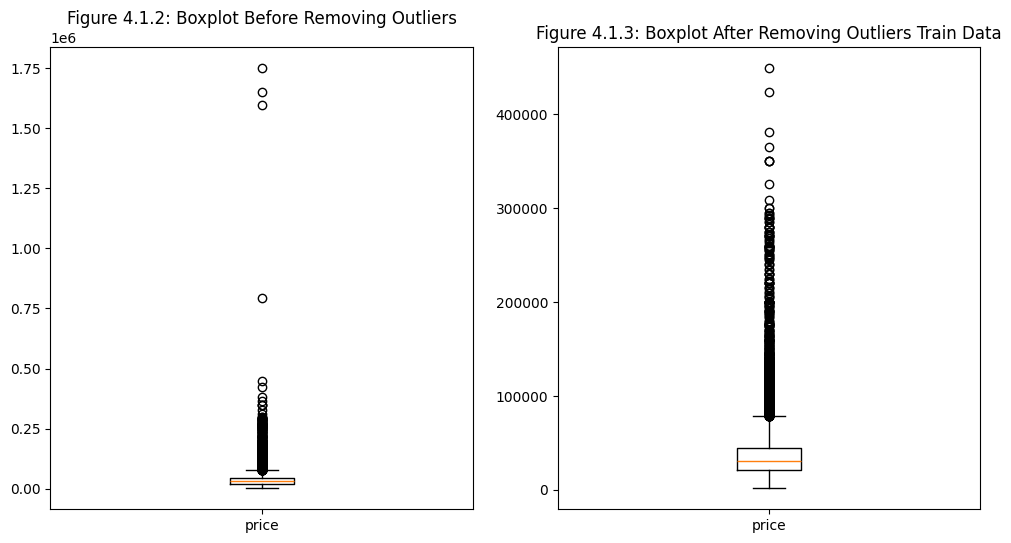

In [27]:
# Plot boxplot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_train['price'], labels=['price'])
plt.title('Figure 4.1.2: Boxplot Before Removing Outliers')

# Remove outliers (assuming outliers are values greater than 450000)
df_train.drop(df_train[df_train['price'] > 450000].index, inplace=True)

# Plot boxplot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_train['price'], labels=['price'])
plt.title('Figure 4.1.3: Boxplot After Removing Outliers Train Data')

plt.show()
plt.show()

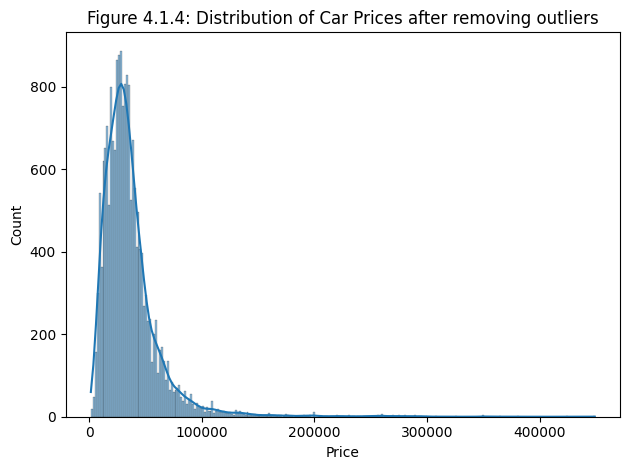

In [28]:
# Histogram of the Distribution of Car Prices after removing outliers
plt.figure()
sns.histplot(df_train['price'], kde=True)
plt.title('Figure 4.1.4: Distribution of Car Prices after removing outliers')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Conclusion
In `Figure 4.1.1` the distribution looks very narrow and tall. In `Figure 4.1.2` there are some outliers can be noticed and boxplot doesn't look normal. In `Figure 4.1.3` after removing the outliers the boxplot has changed and look normal than before. In `Figure 4.1.4` the histogram also looks better than before removing the outliers.

## Visualization of the features

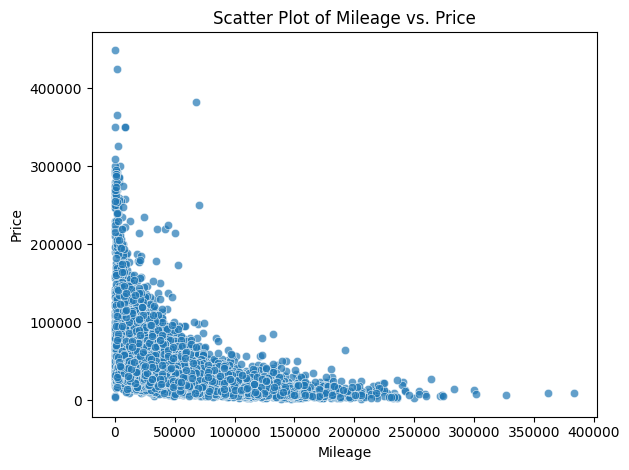

In [29]:
# Scatter plot for Mileage vs. Price
plt.figure()
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.7)  
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**There is an inverse relationship between car mileage and price. The lower the mileage the higher the car price.**

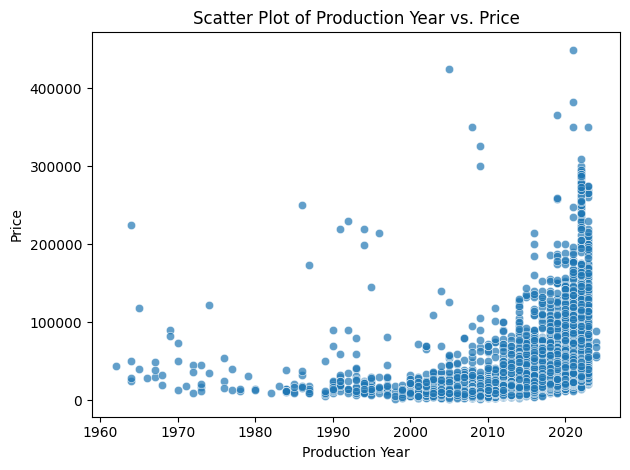

In [30]:
# Scatter plot for Production Year vs. Price
plt.figure()
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.7) 
plt.title('Scatter Plot of Production Year vs. Price')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**From the scatter plot above we can infer that:** <br>
 Cars with recent year of production have higher prices

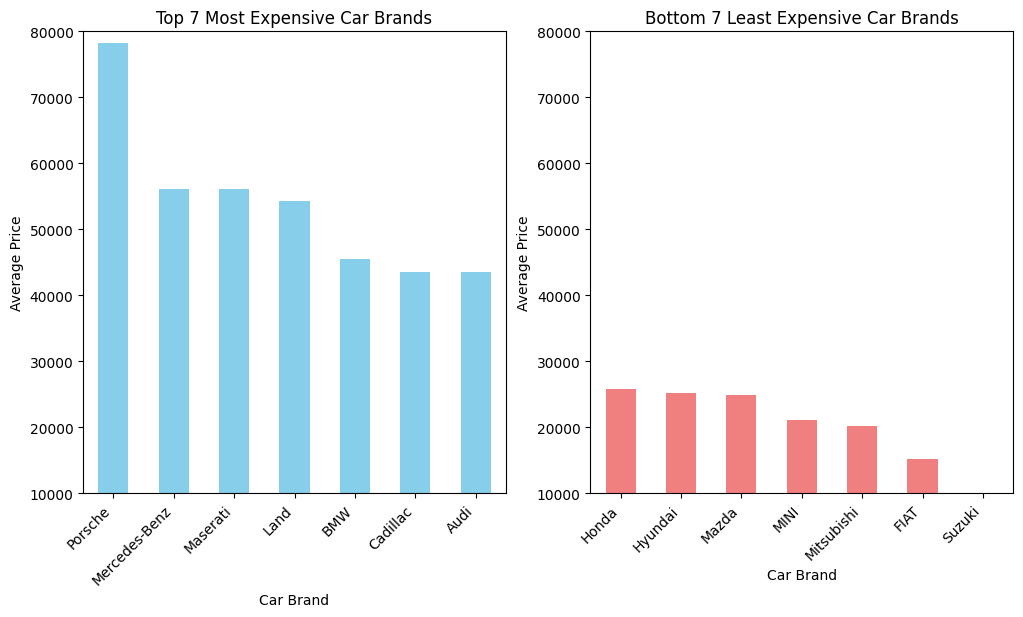

In [31]:
#Snap shot of top 7 most expensive and Bottom 7 least expensive brand of cars

# Calculate the average price for each car brand
average_price_by_brand = df_train.groupby('brand')['price'].mean().sort_values(ascending=False)

# Select the top 7 and bottom 7 brands
top_7_brands = average_price_by_brand.head(7)
bottom_7_brands = average_price_by_brand.tail(7)

# Set the figure size
plt.figure(figsize=(12, 6))

# Calculate a common y-axis range for both subplots
y_axis_range = (
    min(top_7_brands.min(), bottom_7_brands.min()),
    max(top_7_brands.max(), bottom_7_brands.max())
)

# Create the first bar chart for the top 7 brands
plt.subplot(1, 2, 1)
top_7_brands.plot(kind='bar', color='skyblue')
plt.title('Top 7 Most Expensive Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.ylim(10000,80000)

# Create the second bar chart for the bottom 7 brands
plt.subplot(1, 2, 2)
bottom_7_brands.plot(kind='bar', color='lightcoral')
plt.title('Bottom 7 Least Expensive Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.ylim(10000,80000)

# Adjust layout to prevent overlap

plt.show()


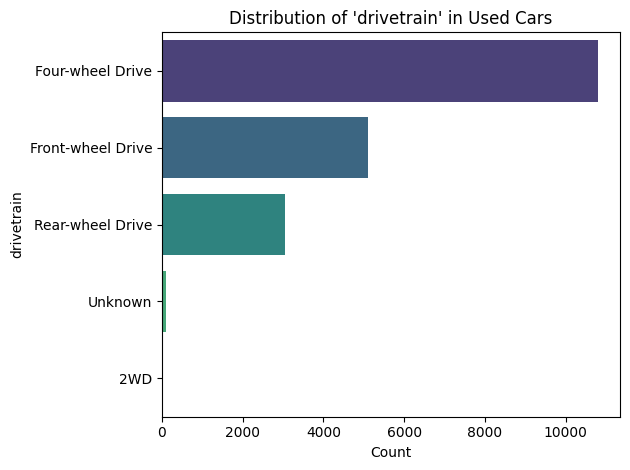

In [32]:
# Calculate the distribution of wheel types
drivetrain_distribution = df_train['drivetrain'].value_counts()

# Set the figure size
plt.figure()

# Create a horizontal bar chart
sns.barplot(x=drivetrain_distribution.values, y=drivetrain_distribution.index, palette='viridis')

plt.title("Distribution of 'drivetrain' in Used Cars")
plt.xlabel('Count')
plt.ylabel('drivetrain')
plt.tight_layout()
plt.show()

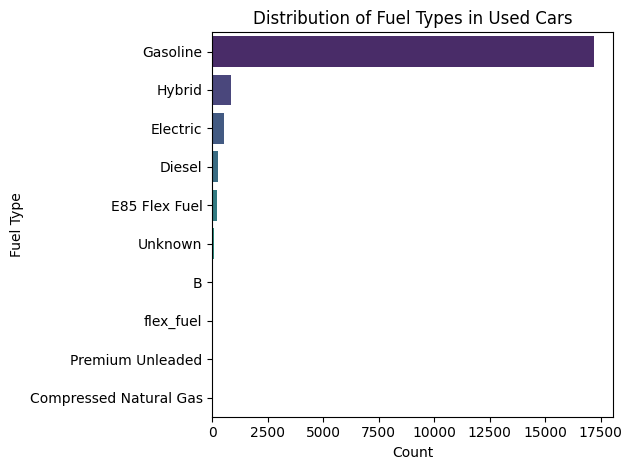

In [33]:
# Calculate the distribution of fuel types
fuel_type_distribution = df_train['fuel_type'].value_counts()

# Set the figure size
plt.figure()

# Create a horizontal bar chart
sns.barplot(x=fuel_type_distribution.values, y=fuel_type_distribution.index, palette='viridis')

plt.title('Distribution of Fuel Types in Used Cars')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()


## Visualization of the correlations between the continuous features

**Correlation is a statistical measure that quantifies the degree to which two variables change together.**

<Figure size 640x480 with 0 Axes>

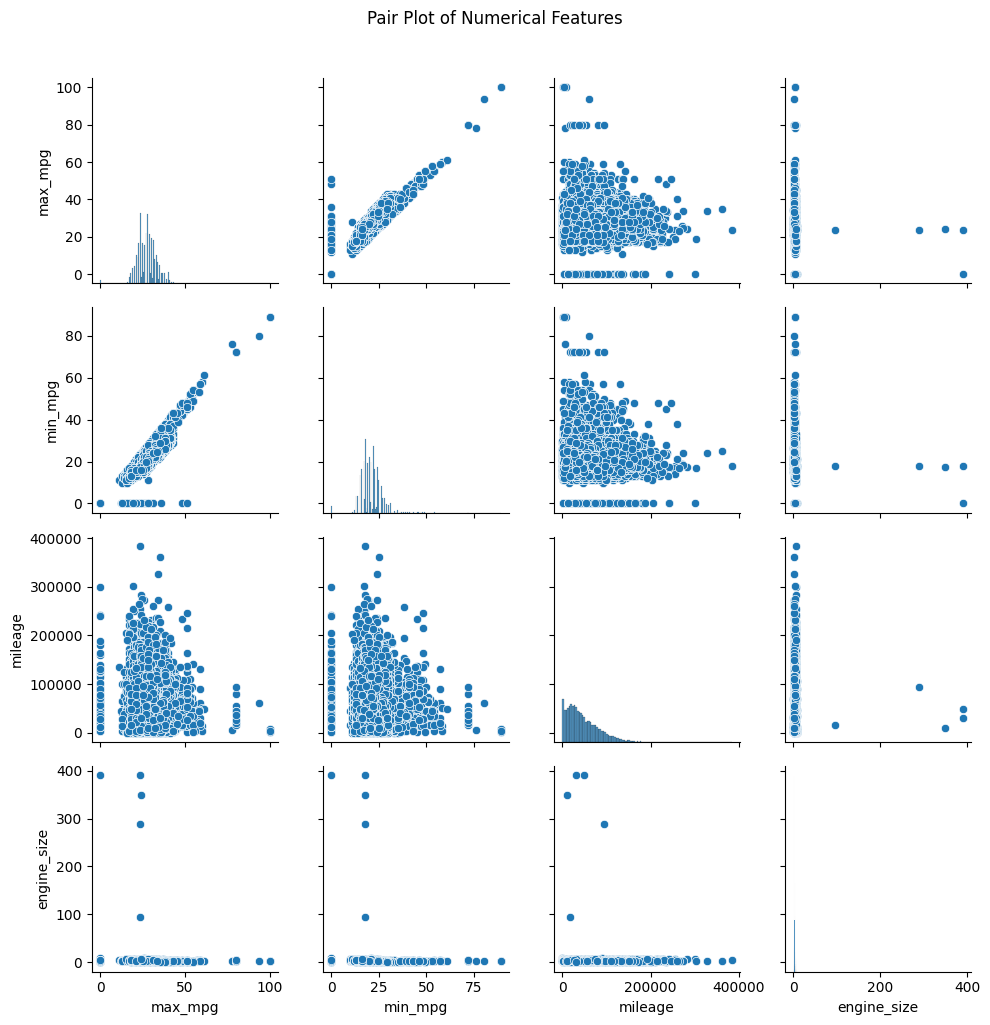

In [34]:
# Set the figure size for the pair plot
plt.figure()
# Create a pair plot for selected numerical features in the training dataset
pairs = sns.pairplot(df_train[['max_mpg', 'min_mpg', 'mileage', 'engine_size']])
# Set the title and styling for the correlation pairsplot
pairs.fig.suptitle('Pair Plot of Numerical Features', y=1.02)
# Show the pair plot
plt.tight_layout()
plt.show()

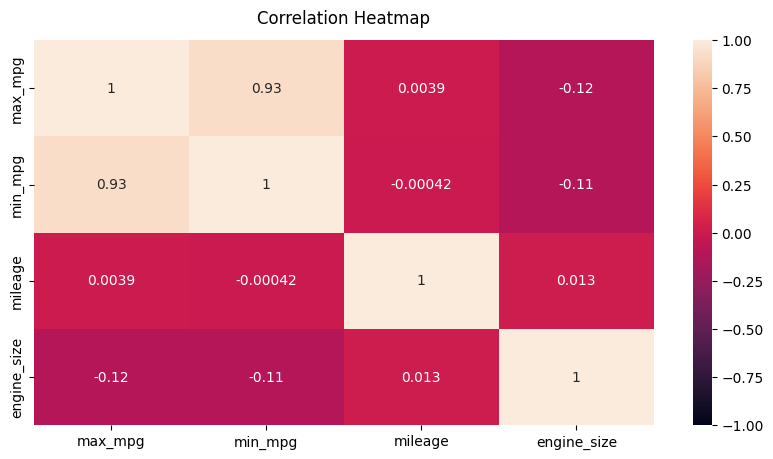

In [35]:
# Set the figure size for the correlation heatmap
plt.figure(figsize=(10, 5))

# Extract a subset of the training data containing selected numerical features
newdata = df_train[['max_mpg', 'min_mpg', 'mileage', 'engine_size']]

# Create a correlation heatmap for the selected features
heatmap = sns.heatmap(newdata.corr(), vmin=-1.0, vmax=1.0, annot=True)

# Set the title and styling for the correlation heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Display the correlation heatmap
plt.show()


### Conclusion
From the correlation plots it's clearly visible that `min_mpg` and `max_mpg` has **positive** correlation. <br>
The pairplot shows the visualization of the points and the heatmap shows the correlation values.

## Comparison between the continuous features before and after transformation

### Histogram and Boxplot of `engine size` before and after transformation

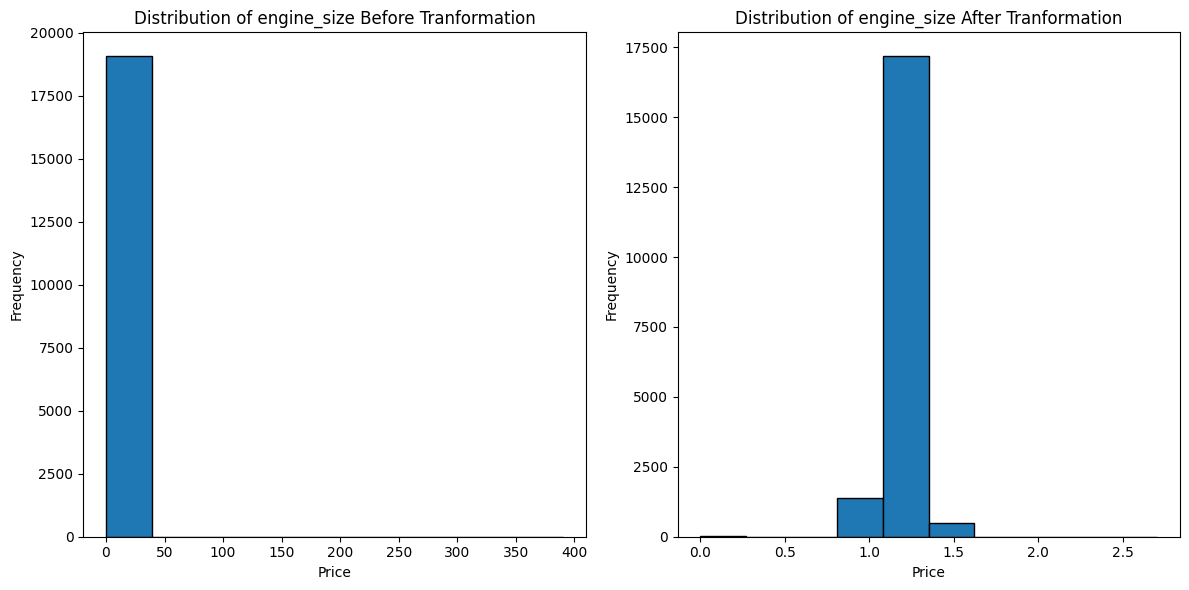

In [36]:
# Plot boxplot before transformation for `engine_size`
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_train['engine_size'], edgecolor='black')
plt.title('Distribution of engine_size Before Tranformation')
plt.xlabel("Price")
plt.ylabel("Frequency")

# Plot boxplot after transformation `engine_size`
plt.subplot(1, 2, 2)
plt.hist(df_train['engine_size']**(1/6), edgecolor='black')
plt.title('Distribution of engine_size After Tranformation')
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.show()

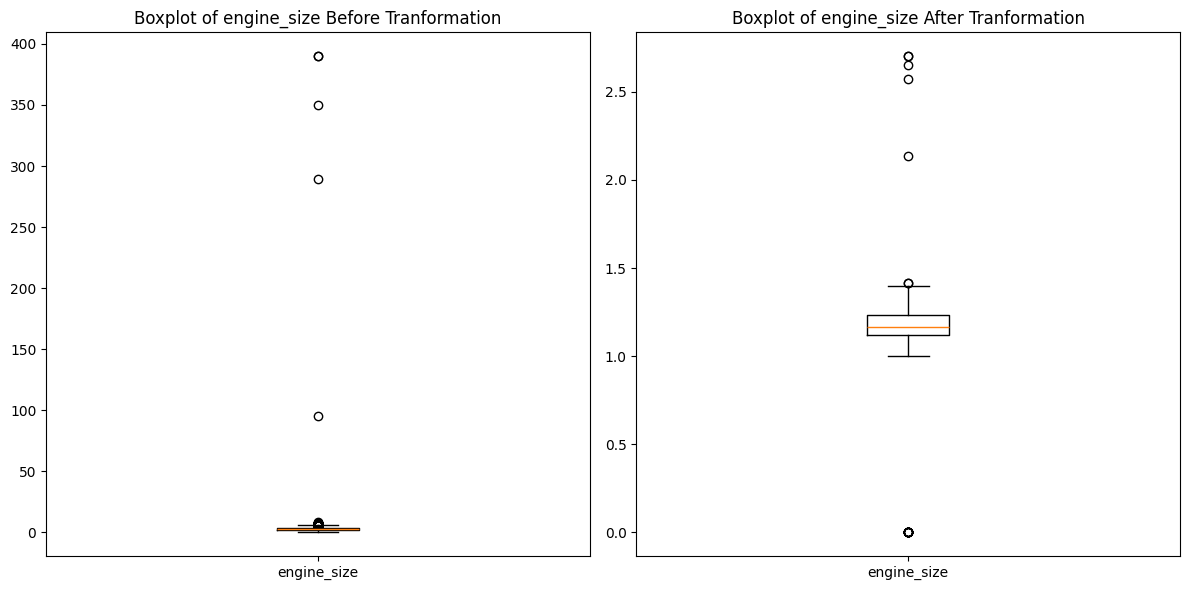

In [37]:
# Plot boxplot before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_train['engine_size'], labels=['engine_size'])
plt.title('Boxplot of engine_size Before Tranformation')

# Plot boxplot after transformation
plt.subplot(1, 2, 2)
plt.boxplot(df_train['engine_size']**(1/6), labels=['engine_size'])

plt.title('Boxplot of engine_size After Tranformation')

plt.tight_layout()
plt.show()
plt.show()

# Transforming 'engine_size' to power of (1/6)
df_train['engine_size'] = df_train['engine_size']**(1/6)


#### Conclusion
Before the transformation, the histogram and boxplot showed the skewness of the `engine_size` feature. <br>
After transforming `engine_size` to the power of (1/6) it gives nearly close to normal distribution. 

### Histogram and Boxplot of `mileage` before and after transformation

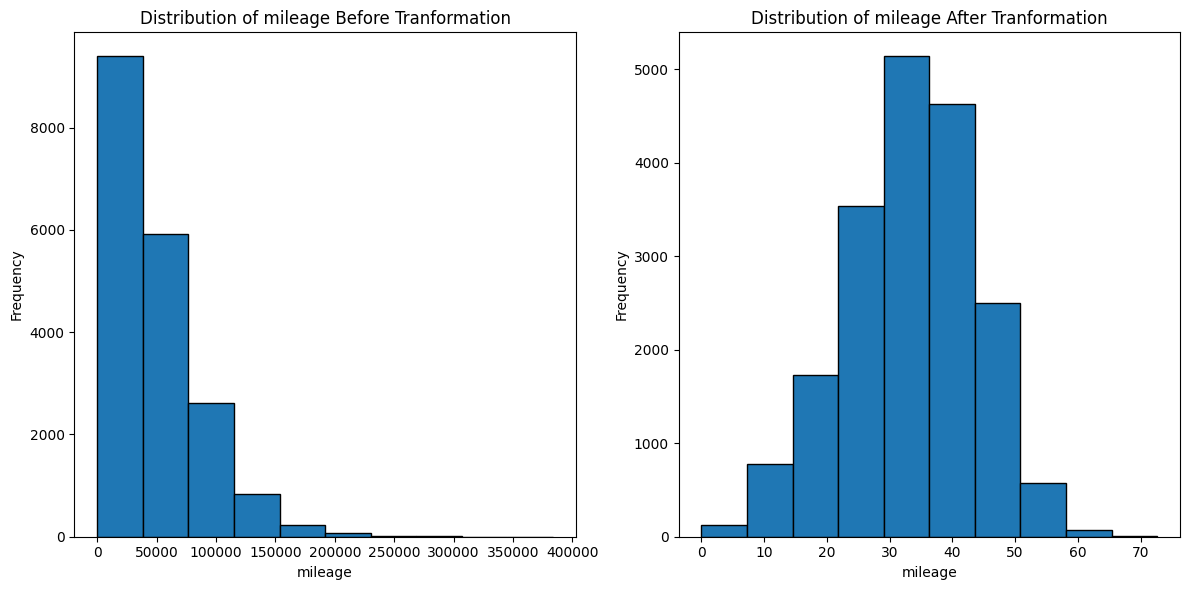

In [38]:
# Plot boxplot before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_train['mileage'], edgecolor='black')
plt.title('Distribution of mileage Before Tranformation')
plt.xlabel("mileage")
plt.ylabel("Frequency")


# Plot boxplot after transformation
plt.subplot(1, 2, 2)
plt.hist((df_train['mileage'])**(1/3), edgecolor='black')
plt.title('Distribution of mileage After Tranformation')
plt.xlabel("mileage")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.show()


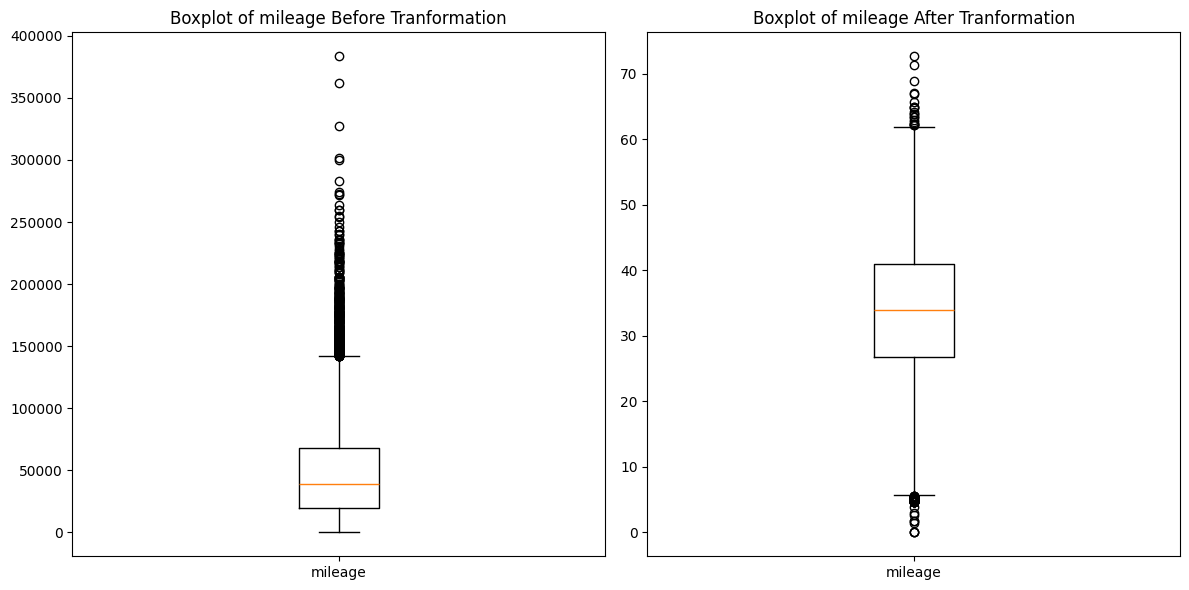

In [39]:
# Plot boxplot before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot((df_train['mileage']), labels=['mileage'])
plt.title('Boxplot of mileage Before Tranformation')

# Plot boxplot after transformation
plt.subplot(1, 2, 2)
plt.boxplot(df_train['mileage']**(1/3), labels=['mileage'])

plt.title('Boxplot of mileage After Tranformation')

plt.tight_layout()
plt.show()
plt.show()


# Transforming 'mileage' to the power of (1/3)
df_train['mileage'] = (df_train['mileage'])**(1/3)

#### Conclusion
Before the transformation, the histogram and boxplot showed the skewness of the `mileage` feature. <br>
After transforming `mileage` to the power of (1/3) it gives nearly close to normal distribution. 

### Histogram and Boxplot of `min_mpg` and `max_mpg` after feature engineering

#### Making a new column `mpg` by taking the mean of `min_mpg` and `max_mpg`

From the correlation plot the high **positive** correlation is visible for `max_mpg` and `min_mpg`. <br>
So, we create a new column by taking the average of `max_mpg` and `min_mpg` columns and drop those two columns.

In [40]:
# Calculate the average miles per gallon (mpg) by taking the mean of 'min_mpg' and 'max_mpg'
df_train['mpg'] = (df_train['min_mpg'] + df_train['max_mpg']) / 2

# Drop the 'min_mpg' and 'max_mpg' columns as they are no longer needed
df_train.drop(['min_mpg', 'max_mpg'], axis=1, inplace=True)


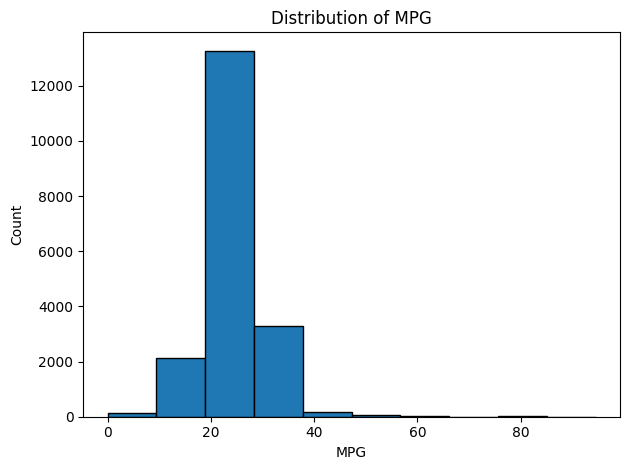

In [41]:
# Create a histogram of the 'mpg' column
plt.hist(df_train['mpg'], edgecolor='black')

# Set the title of the histogram
plt.title('Distribution of MPG')

# Set the x-axis label
plt.xlabel("MPG")

# Set the y-axis label
plt.ylabel("Count")

# Display the histogram
plt.tight_layout()
plt.show()


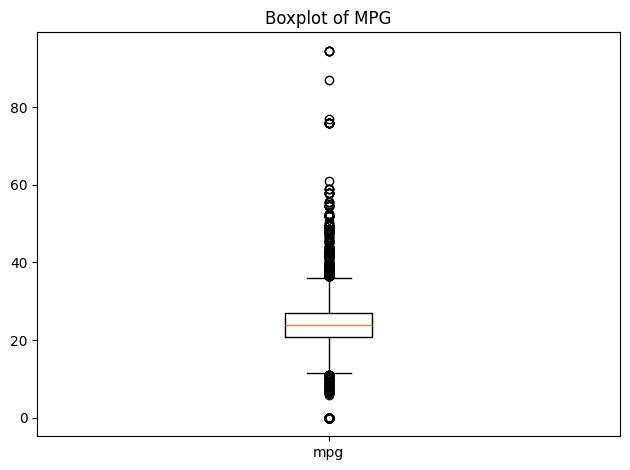

In [42]:
# Create a boxplot for the 'mpg' column
plt.boxplot(df_train['mpg'], labels=['mpg'])

# Set the title of the boxplot
plt.title('Boxplot of MPG')

# Adjust layout for better presentation
plt.tight_layout()

# Display the boxplot
plt.tight_layout()
plt.show()


## Visualize the binary class features

In [43]:
# getting all the binary class features' names as a list
binary_class_features = [col for col in df_train.columns if (df_train[col].dtype == int) & (len(df_train[col].unique()) < 3)]    

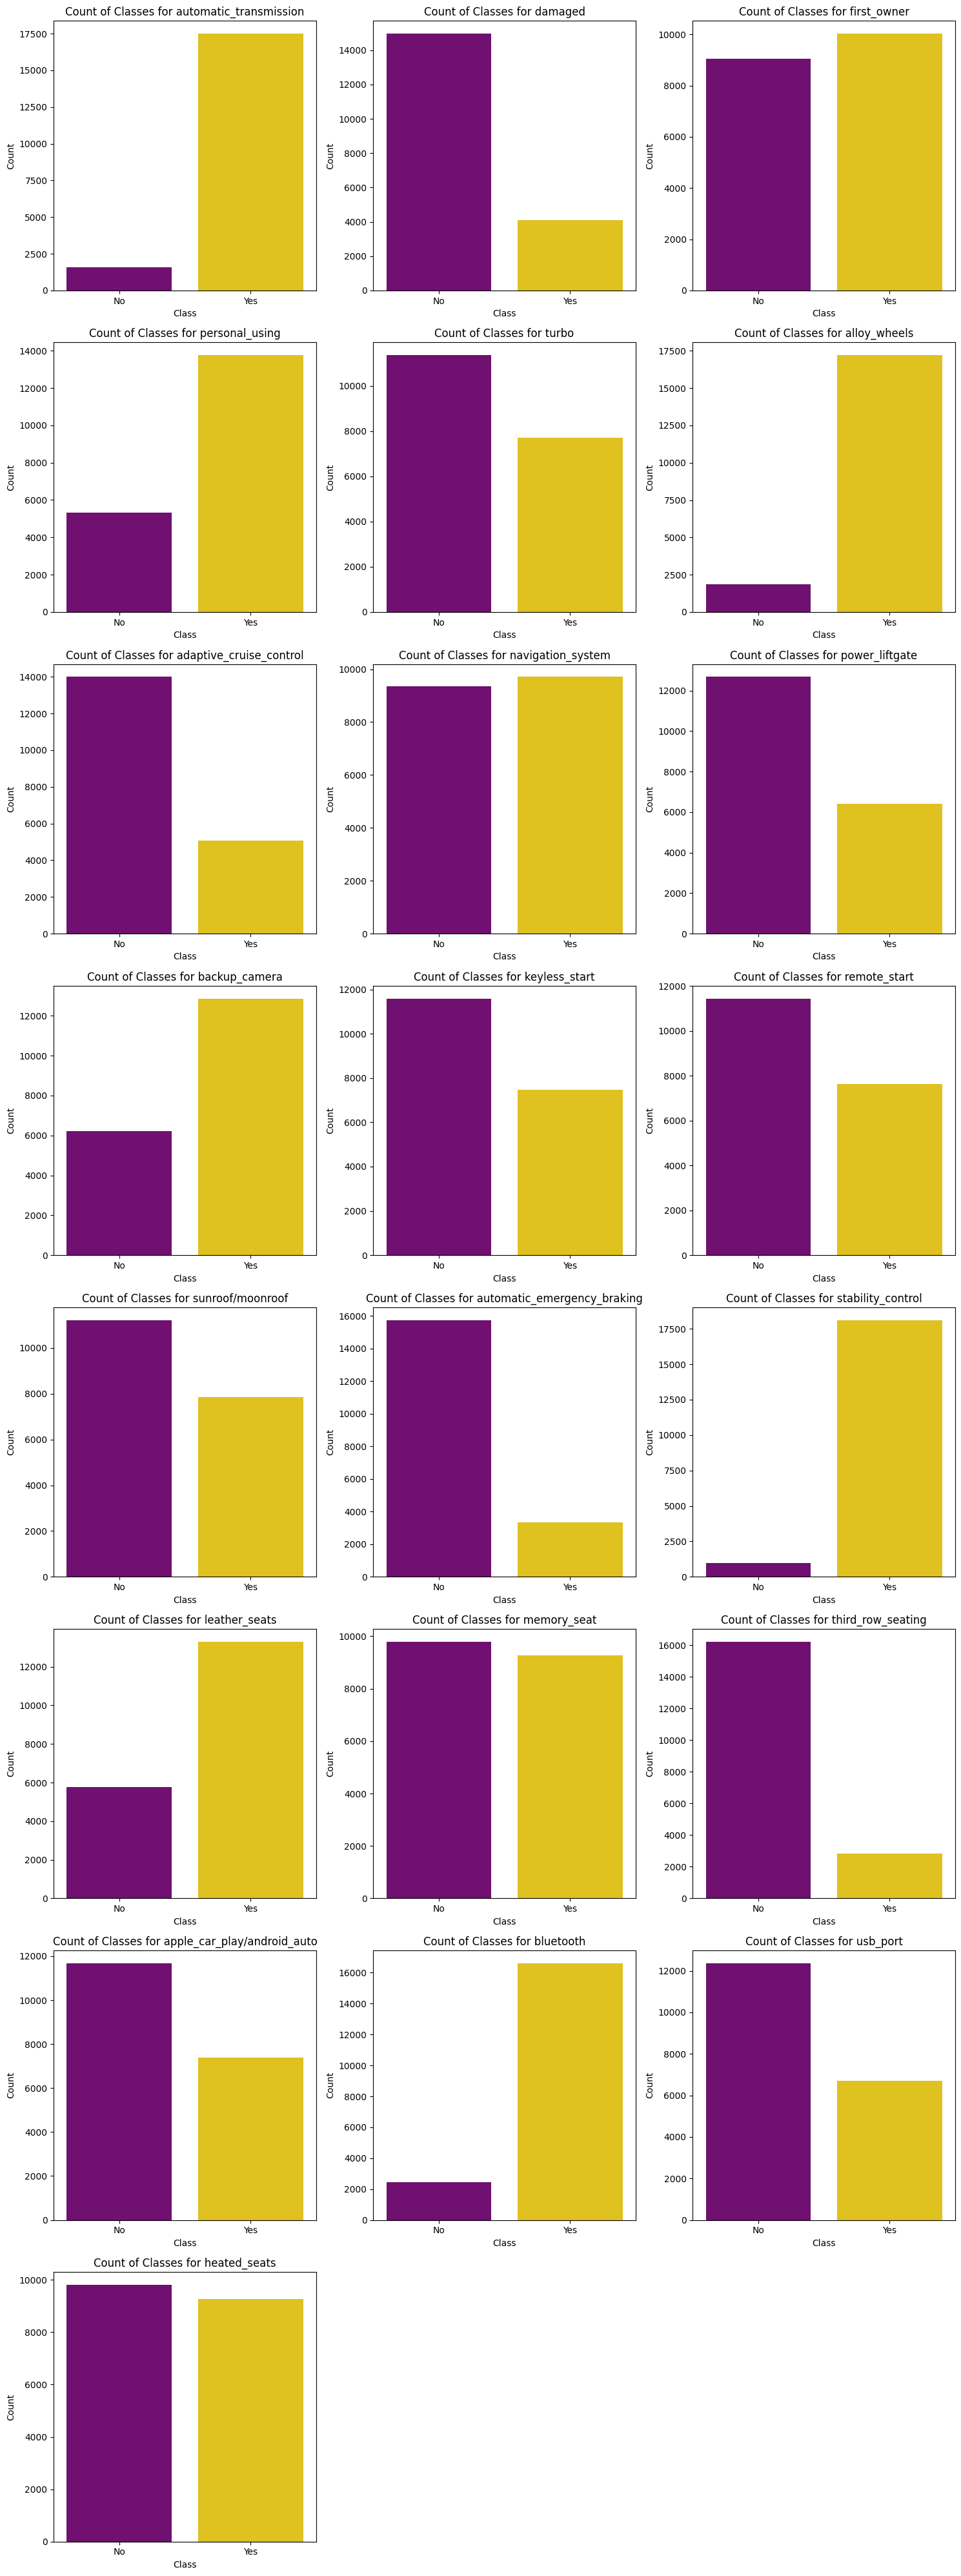

In [44]:
# Set the number of plots per row
plots_per_row = 3

# Calculate the number of rows needed for subplots
num_rows = (len(binary_class_features) - 1) // plots_per_row + 1

# Create subplots with specified layout and size
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Loop through binary class features for count plots
for i, feature in enumerate(binary_class_features):
    ax = axes[i]
    
    # Create a count plot for the current feature with a color palette
    sns.countplot(x=feature, data=df_train, ax=ax, palette=['purple', 'gold'])
    
    # Set title and labels for the count plot
    ax.set_title(f'Count of Classes for {feature}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['No', 'Yes'])

# Remove any unused subplots
for i in range(len(binary_class_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better presentation
plt.tight_layout()

# Display the count plots
plt.tight_layout()
plt.show()


# Pre_processing the data before training

## Encode categorical features 

In [45]:
def encode_object_features(cols, data):
    """
    Encodes categorical features using Target Encoding.

    Parameters:
    - cols: List of categorical column names to be encoded.
    - data: DataFrame containing the dataset.

    Returns:
    Updated DataFrame with encoded categorical features.
    """
    target_encoder = TargetEncoder()
    for i in cols:
        # Initialize a TargetEncoder for the current categorical column 
        
        # Fit and transform the current categorical column using the 'price' column as the target
        data[i] = target_encoder.fit_transform(data[i], data['price'])
    
    # Return the updated DataFrame with encoded categorical features
    return data


In [46]:
# categorical features encoding
df_train = encode_object_features(cate_features, df_train)

In [47]:
y = df_train['price']
df_train.drop(['price'], axis=1, inplace=True)

In [48]:
# Initialize MinMaxScaler
scaler1 = MinMaxScaler()

# fit and transform the training data
df_trainNorm = scaler1.fit_transform(df_train)

In [49]:
df_train = pd.DataFrame(df_trainNorm, columns=df_train.columns) # converting the array to dataframe

In [50]:
# Initialize MinMaxScaler
scaler2 = MinMaxScaler()

# fit and transform the training data
y_norm = scaler2.fit_transform(np.array(y).reshape(-1, 1))


In [51]:
# Split the dataset into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, y_norm, test_size=0.2, random_state=42)   

## Build and train models

### Focused on Tree-based models

In [52]:
Regressor = [LinearRegression(),
             XGBRegressor(),
             RandomForestRegressor(),
             DecisionTreeRegressor()]

In [53]:
# Define the number of folds
num_folds = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


results_df = pd.DataFrame(columns=['Model', 'R^2 Score', 'MSE', 'MAE', 'Cross-Val MSE Mean'])
predictions_df = pd.DataFrame(index=range(len(x_test)))

for model in Regressor:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # save the model to disk
    filename = f'finalized_{model_name}.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Perform 5-fold cross-validation
    cross_val_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    cross_val_mse_mean = -cross_val_scores.mean()  # negate to get positive MSE
    
    # Append results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'R^2 Score': r2,
        'MSE': mse,
        'MAE': mae,
        'Cross-Val MSE Mean': cross_val_mse_mean
    }, ignore_index=True)
    
    predictions_df[model_name] = y_pred


#### Visualizing the results for the Tree-based models

In [54]:
# Print the results
results_df.sort_values(by="MSE")

,Model,R^2 Score,MSE,MAE,Cross-Val MSE Mean
1,XGBRegressor,0.934638,0.000244,0.007980,0.000380
2,RandomForestRegressor,0.922605,0.000289,0.008383,0.000378
3,DecisionTreeRegressor,0.834505,0.000618,0.011876,0.000700
0,LinearRegression,0.762384,0.000888,0.017240,0.000962


In [55]:
# Load a pre-trained XGBoost Regressor model from the saved file 'finalized_XGBRegressor.sav'
loaded_model = pickle.load(open('finalized_XGBRegressor.sav', 'rb'))

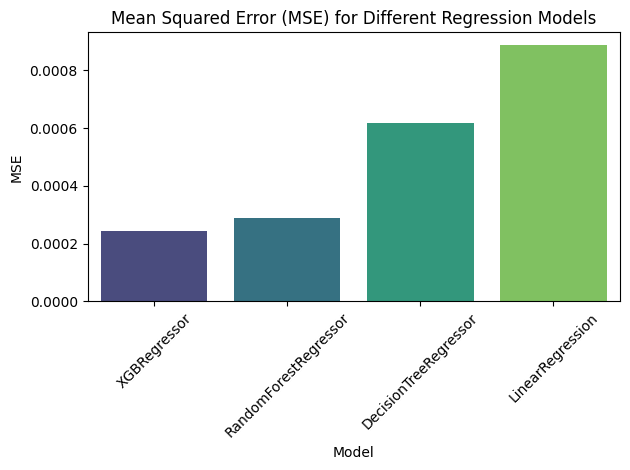

In [56]:
# Set the figure size for the plot
plt.figure()

# Create a bar plot
# x-axis represents the 'Model' column, y-axis represents the 'MSE' column
# Data is provided through the 'results_df' DataFrame
# Color palette is set to 'viridis'
sns.barplot(x='Model', y='MSE', data = results_df.sort_values(by="MSE"), palette='viridis')

# Set the title of the plot
plt.title('Mean Squared Error (MSE) for Different Regression Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

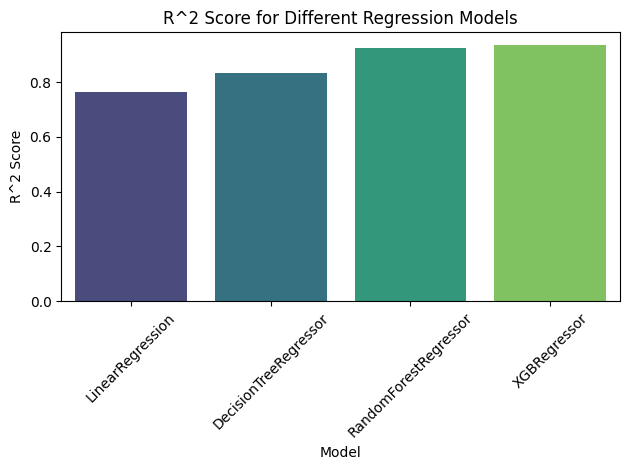

In [57]:
# Set the figure size for the plot
plt.figure()

# Create a bar plot
# x-axis represents the 'Model' column, y-axis represents the 'MSE' column
# Data is provided through the 'results_df' DataFrame
# Color palette is set to 'viridis'
sns.barplot(x='Model', y='R^2 Score', data = results_df.sort_values(by="R^2 Score"), palette='viridis')

# Set the title of the plot
plt.title('R^2 Score for Different Regression Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

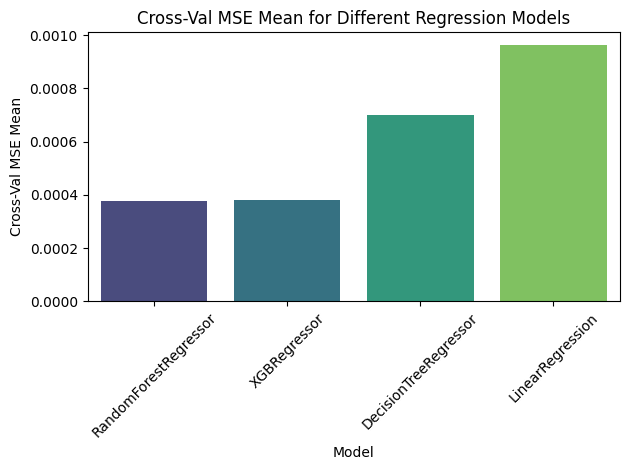

In [58]:
# Set the figure size for the plot
plt.figure()

# Create a bar plot
# x-axis represents the 'Model' column, y-axis represents the 'MSE' column
# Data is provided through the 'results_df' DataFrame
# Color palette is set to 'viridis'
sns.barplot(x='Model', y='Cross-Val MSE Mean', data = results_df.sort_values(by="Cross-Val MSE Mean"), palette='viridis')

# Set the title of the plot
plt.title('Cross-Val MSE Mean for Different Regression Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Added some other regression models

In [59]:
# Create a LassoCV (Lasso Cross-Validation) model with 5-fold cross-validation
lasso = LassoCV(cv=5)

# Fit the LassoCV model on the training data
lasso.fit(x_train, y_train)

LassoCV(cv=5)

In [60]:
# Create an ElasticNetCV (Elastic Net Cross-Validation) model with 5-fold cross-validation
elastic_net = ElasticNetCV(cv=5)

# Fit the ElasticNetCV model on the training data
elastic_net.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [61]:
# Create an RidgeCV (Ridge Cross-Validation) model with 5-fold cross-validation
ridge2 = RidgeCV(cv=5)

# Fit the RidgeCV model on the training data
ridge2.fit(x_train, y_train)

RidgeCV(cv=5)

In [62]:
Regressor.extend([lasso, ridge2, elastic_net]) # Extend the list 'Regressor' with the created regression models (lasso, ridge2, elastic_net)

In [63]:
Regressor

[LinearRegression(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 RandomForestRegressor(),
 DecisionTreeRegressor(),
 LassoCV(cv=5),
 RidgeCV(cv=5),
 ElasticNetCV(cv=5)]

In [64]:
# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=['Model', 'R^2 Score', 'MSE', 'MAE'])

# Create an empty DataFrame to store the predictions
predictions_df2 = pd.DataFrame(index=range(len(x_test)))

for model in Regressor:
    
    # Get the name of the model class
    model_name = model.__class__.__name__
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics: R^2 Score, MSE, and MAE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the results DataFrame
    results_df2 = results_df2.append({'Model': model_name, 'R^2 Score': r2, 'MSE': mse, 'MAE': mae}, ignore_index=True)
    
    # Add the predictions to the predictions DataFrame
    predictions_df2[model_name] = y_pred

In [65]:
results_df2.sort_values(by="MSE", inplace=True) # Sort the 'results_df2' DataFrame based on the 'MSE' column in ascending order

In [66]:
results_df2

,Model,R^2 Score,MSE,MAE
1,XGBRegressor,0.934638,0.000244,0.007980
2,RandomForestRegressor,0.923755,0.000285,0.008321
3,DecisionTreeRegressor,0.828902,0.000639,0.011756
5,RidgeCV,0.762433,0.000888,0.017236
0,LinearRegression,0.762384,0.000888,0.017240
6,ElasticNetCV,0.762333,0.000888,0.017192
4,LassoCV,0.762265,0.000888,0.017198


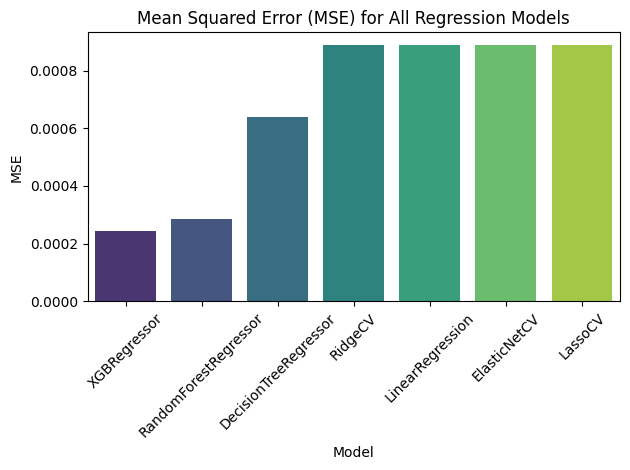

In [67]:
# Set the figure size for the plot
plt.figure()

# Create a bar plot
# x-axis represents the 'Model' column, y-axis represents the 'MSE' column
# Color palette is set to 'viridis'
sns.barplot(x='Model', y='MSE', data=results_df2, palette='viridis')

# Set the title of the plot
plt.title('Mean Squared Error (MSE) for All Regression Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Feature Importance plot

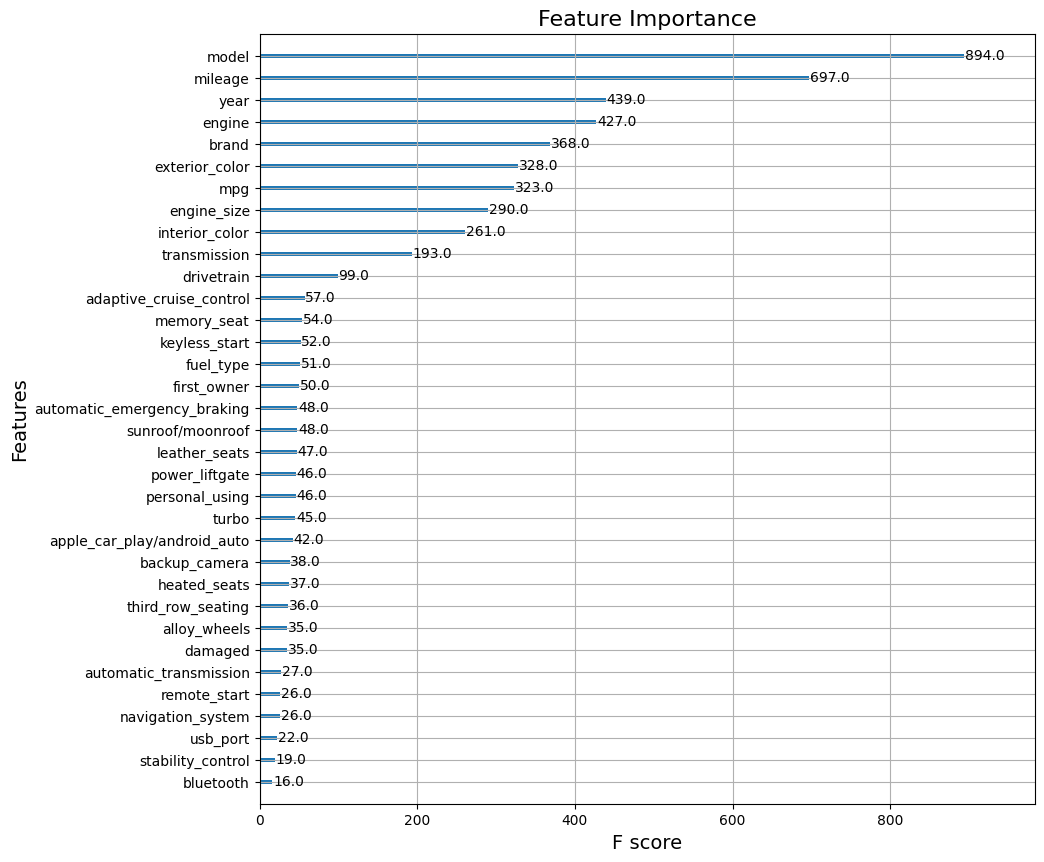

In [68]:
# Assuming you have loaded an XGBoost model named 'loaded_model'
# Make sure to replace 'loaded_model' with the variable name you used for your loaded model

# Plot feature importance
ax = xgb.plot_importance(loaded_model)

# Customize plot appearance
plt.gcf().set_size_inches(10, 10)  # Adjust figure size
plt.title('Feature Importance', fontsize=16)  # Add title
plt.xlabel('F score', fontsize=14)  # Customize x-axis label
plt.ylabel('Features', fontsize=14)  # Customize y-axis label

plt.show()


### Visuzalize the actual vs predicted values

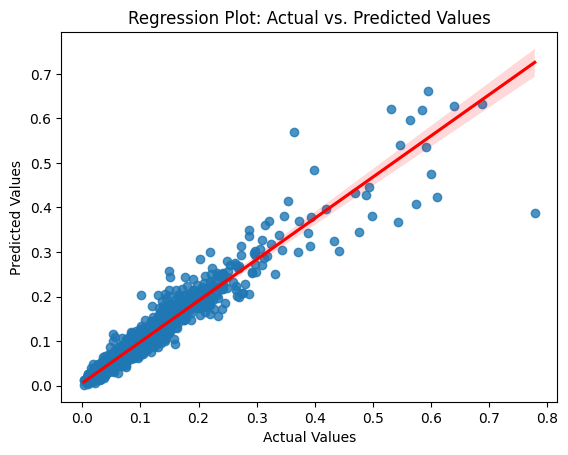

In [69]:
# Create a scatter plot with a regression line for predicted vs. actual values
sns.regplot(x=y_test, y=predictions_df.XGBRegressor, line_kws={'color': 'red'})

# Set the title of the scatter plot
plt.title('Regression Plot: Actual vs. Predicted Values')

# Label the x-axis
plt.xlabel('Actual Values')

# Label the y-axis
plt.ylabel('Predicted Values')

# Display the scatter plot
plt.show()


#### Conclusion
We have used three tree-based regression models and Linear Regression. Among the four models `XGBRegressor` outperforms. We have also used 5-fold cross-validation on the training data. For evaluation metric we used `Mean Squared Error`, `R^2` `Mean Absolute Error`. Even though `XGBRegreesor` outperforms, while calculating `Cross Validation Mean MSE`,  `DecisionTreeRegressor` has slightly smaller value than `XGBRegreesor`.

# Inference 

In [70]:
df_test = pd.read_csv ('test.csv') # read the training data

## Pipeline for preparing the test data before prediction

In [71]:
# Convert 'price' column to numeric, handling errors by coercing to NaN
df_test['price'] = pd.to_numeric(df_test['price'], errors='coerce')


# Check and display the count of missing values in each column
df_test.isnull().sum()

# Drop rows with missing values in the 'price' column
df_test.dropna(subset=['price'], inplace=True)

# Impute missing values in specified columns using the mean grouped by other columns
df_test = replace_mean_groupby(['engine_size', 'min_mpg', 'max_mpg'], df_test)

# Impute missing categorical values using backward fill
df_test = replace_categorial(['engine', 'transmission', 'interior_color', 'exterior_color'], df_test, 'bfill')

# Impute missing values using mode grouped by other columns
df_test = replace_mode_groupby(['damaged', 'first_owner', 'personal_using'], df_test)

# Identify categorical and continuous features in the DataFrame
cate_features_test, cont_features_test = check_dtype(df_test)

# Convert selected continuous features to integer type
df_test = change_to_int_type(cont_features_test, df_test)

# Convert the 'year' column to integer type
df_test['year'] = df_test['year'].astype(int)

# Transform 'engine_size' to the power of (1/6)
df_test['engine_size'] = df_test['engine_size']**(1/6)

# Transform 'mileage' to the power of (1/3)
df_test['mileage'] = (df_test['mileage'])**(1/3)

# Calculate 'mpg' as the average of 'min_mpg' and 'max_mpg'
df_test['mpg'] = (df_test['min_mpg'] + df_test['max_mpg'])/2

# Drop 'min_mpg' and 'max_mpg' columns as they are no longer needed
df_test.drop(['min_mpg', 'max_mpg'], axis=1, inplace=True)

# Encode object features using target encoding
df_test = encode_object_features(cate_features, df_test)

# Extract the 'price' column as the target variable for testing
y_val = df_test['price']

# Drop the 'price' column from the test set, leaving only the features
df_test.drop(['price'], axis=1, inplace=True)

# Normalize the DataFrame using the previously fitted scaler
dfTestNorm = scaler1.transform(df_test)
df_test = pd.DataFrame(dfTestNorm, columns=df_test.columns)

y_val_norm = scaler2.transform(np.array(y_val).reshape(-1, 1))


In [72]:
# Display the first 4 rows of the DataFrame df_test
df_test.head(4)

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,mpg
0,0.102702,0.109591,0.935484,0.431545,0.036704,0.391301,0.117083,1.0,0.491794,0.868885,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.323139,0.240868,0.322751
1,0.442601,0.127809,0.919355,0.533573,0.135641,0.455863,0.115340,1.0,0.626400,0.903647,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.423018,0.272471,0.227513
2,0.296717,0.125022,0.903226,0.565309,0.129531,0.451414,0.271923,1.0,0.491794,0.903647,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.312033,0.249338,0.227513
3,0.178168,0.099637,0.983871,0.235745,0.107723,0.415267,0.316500,1.0,0.491794,-0.001469,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.089320,0.188457,0.317460


## Predicting the car price for the test data using the best model `XGBRegressor`

In [73]:
# Load a pre-trained XGBoost Regressor model from the saved file 'finalized_XGBRegressor.sav'
loaded_model = pickle.load(open('finalized_XGBRegressor.sav', 'rb'))

# Make predictions on the test data using the loaded model
val_result = loaded_model.predict(df_test)


In [74]:
# Create an empty DataFrame to store the inference results
results_val = pd.DataFrame(columns=['Model', 'R^2 Score', 'MSE', 'MAE'])


# the name of the best model 
model_name = 'XGBRegressor'


# Calculate evaluation metrics: R^2 Score, MSE, and MAE
r2_val = r2_score(y_val_norm, val_result)
mse_val = mean_squared_error(y_val_norm, val_result)
mae_val = mean_absolute_error(y_val_norm, val_result)

# Append the results to the results DataFrame
results_val = results_val.append({'Model': model_name, 'R^2 Score': r2_val, 'MSE': mse_val, 'MAE': mae_val}, ignore_index=True)

# print results
results_val

,Model,R^2 Score,MSE,MAE
0,XGBRegressor,0.890235,0.000398,0.010403


### Visualize the Actual vs Predicted `Price`

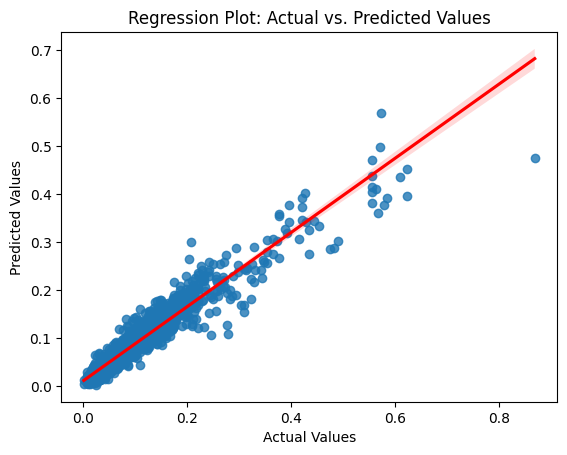

In [75]:
# Create a scatter plot with a regression line for predicted vs. actual values
sns.regplot(x=y_val_norm, y=val_result, line_kws={'color': 'red'})

# Set the title of the scatter plot
plt.title('Regression Plot: Actual vs. Predicted Values')

# Label the x-axis
plt.xlabel('Actual Values')

# Label the y-axis
plt.ylabel('Predicted Values')

# Display the scatter plot
plt.show()

In [76]:
y_val = scaler2.inverse_transform(val_result.reshape(-1, 1))

In [77]:
df_test['price'] = y_val
df_test['price'] = df_test.price.apply(lambda x: round(x, 2))

### Displaying 10 rows of id and Predicted `price`

In [78]:
pd.DataFrame(df_test['price'].sample(10))

,price
3554,41126.92
4524,38090.64
2227,91479.38
2602,27626.29
4084,32119.25
179,24683.71
1665,36455.02
3108,23871.36
38,27362.97
1982,26533.18


# Team Challenges

1. **Description**: The dataset exhibited variations in data quality and completeness. Some entries had missing values, and there were outliers that skewed the predictions. <br>
**Impact**: This made it challenging to build a robust predictive model, as incomplete or inaccurate data can lead to biased predictions. <br>
**Solution**: Implemented a data cleaning strategy, including handling missing values, outliers, and inconsistencies. Used imputation techniques and outlier detection to enhance data quality. <br>
2. **Description**: The dataset exhibited numerous categorical variables for the 'brand' feature. <br>
**Impact**: The presence of numerous categorical variables related to car brands resulted in a visually cluttered representation. <br>
**Solution**: To address this issue, we successfully grouped the brands into two categories: the top 7 most expensive and the bottom 7 least expensive car brands. <br>
3. **Description**: The project faced a challenge with skewed continuous features, adversely affecting model performance due to right-skewness. <br>
**Impact**: Skewed data could lead to inaccurate predictions and hinder the model's ability to capture meaningful patterns, necessitating the need for transformation. <br>
**Solution**: Applied different types transformations to mitigate skewness and regularly visualization helped to overcome the problem. <br>
4. **Description**: Encountering novel concepts in machine learning posed significant challenges during the project. There were instances where we lacked familiarity with certain concepts, hindering seamless progress. <br>
**Impact**: The unfamiliarity with these concepts created potential bottlenecks and slowed down certain aspects of the project. It necessitated additional effort and collaboration to bridge the knowledge gap, impacting overall efficiency. <br>
**Solution**: To address this challenge, we actively sought assistance from each other and seeked guidance from team members who possessed expertise in the unfamiliar concepts. Hence, Guidance and collaboration proved invaluable in overcoming the hurdles. Through this collaborative learning experience, we not only gained a better understanding of the new concepts but also developed skills in debugging, problem-solving, and critical thinking, enhancing our overall proficiency in machine learning.

# Questions Answered

**Q1.** How effectively can we develop an accurate machine learning model for predicting used car prices based on the available features, <br> and what is the optimal algorithm and feature selection approach to achieve this? 

**Answer**: Our model accurately predicts used car prices with an 89% success rate (R^2 score: 0.890235). Low MSE (0.00039) confirms minimal errors. XGBoost's built-in feature selection eliminates the need for extra methods, making it the optimal algorithm for precise and efficient predictions.

**Q2.** Which features have the most significant impact on the price of a used car? Can we identify the key features that influence car pricing decisions the most?

**Answer**: We successfully identified the key features influencing car pricing decisions using XGBoost feature importance analysis. Our plot reveals the top 5 significant features, ranked in descending order: model, mileage, year, engine, and brand. These findings shed light on the factors that most significantly impact the pricing of used cars, providing valuable insights for understanding market dynamics and informing pricing decisions 

**Q3.** To what extent can the application of data preprocessing techniques, including transformation, standardization, and normalization, enhance the prediction performance of our predictive models? <br>

**Answer**: Our investigation into the impact of data preprocessing techniques on predictive models revealed noteworthy insights. Employing target encoders for encoding categorical features and various transformations, such as logarithmic, cube root, and power transformations (1/6) for continuous features, significantly influenced the model's predictive performance. Additionally, the utilization of MinMaxScaler proved crucial, as without it, our models exhibited substantial errors. This underscores the importance of thoughtful data preprocessing, including feature encoding and transformation, in enhancing the overall predictive accuracy and stability of our models. The findings suggest that a well-crafted preprocessing pipeline, tailored to the characteristics of the dataset, can play a pivotal role in optimizing predictive model performance.

What evaluation metrics should be used to assess the performance of the price prediction models? 

**Answer:** For evaluating the effectiveness of price prediction models, it's recommended to use R^2, which gauges the proportion of variance explained by the model. Additionally, mean absolute error (MAE) provides insights into the average prediction error magnitude, while mean squared error (MSE) emphasizes the squared differences between predicted and actual values, giving more weight to larger errors. This combination of metrics offers a comprehensive assessment, capturing accuracy, precision, and overall model performance.

**Q4.** To what extent do the models built on this dataset generalize to new, unseen data?

**Answer:** The models built on this dataset exhibit promising generalization to new, unseen data. The R^2 score of 0.890235 achieved by our XGBoost regressor, along with low MSE (0.00039) and MAE (0.010403) values, signifies robust predictive performance on the test data. Notably, the test data used for evaluation was entirely new, ensuring that the model's efficacy extends beyond the training dataset. These metrics collectively suggest that our model has the potential to make accurate predictions on unfamiliar data, indicating a reasonable level of generalization.